<a href="https://colab.research.google.com/github/Suthir731/Codsoft-Intern/blob/main/task_1_codsoft.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Accuracy: 0.83
              precision    recall  f1-score   support

           0       0.83      0.90      0.86       105
           1       0.83      0.74      0.79        74

    accuracy                           0.83       179
   macro avg       0.83      0.82      0.82       179
weighted avg       0.83      0.83      0.83       179



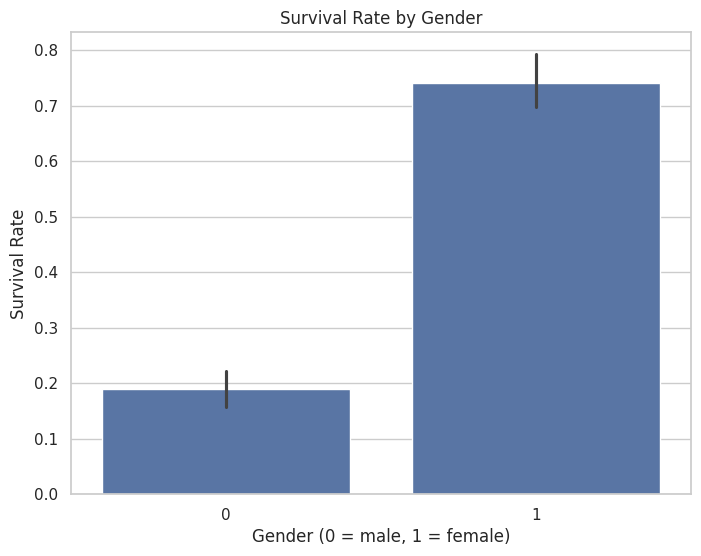

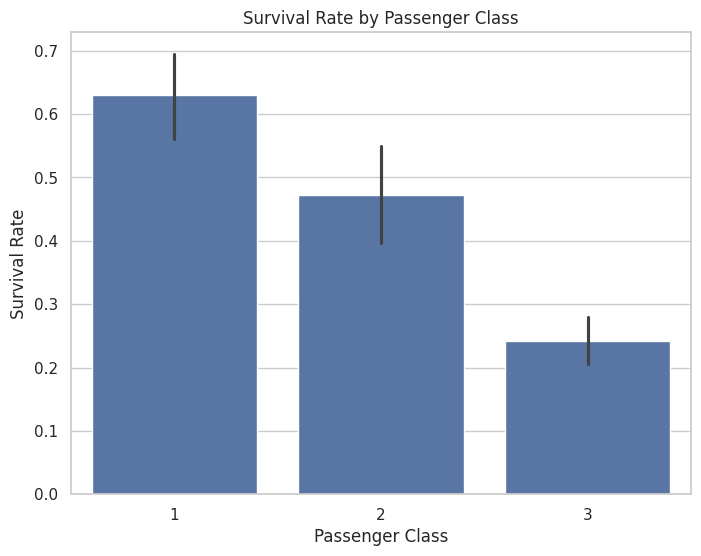

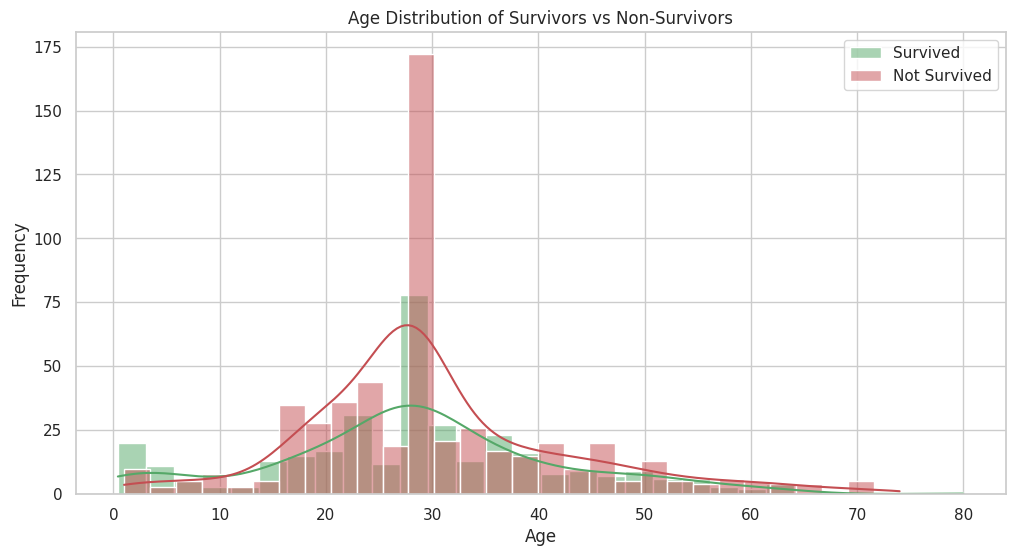

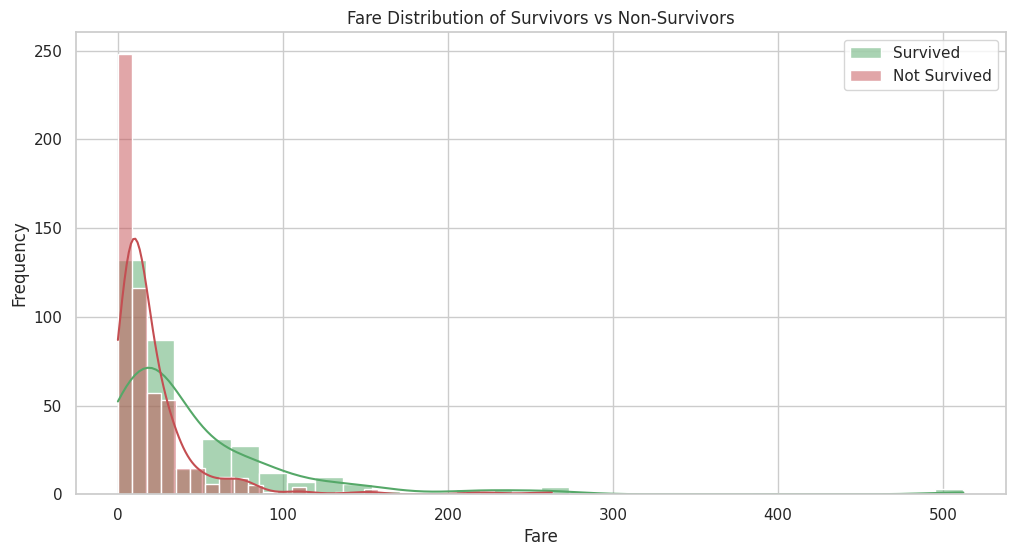

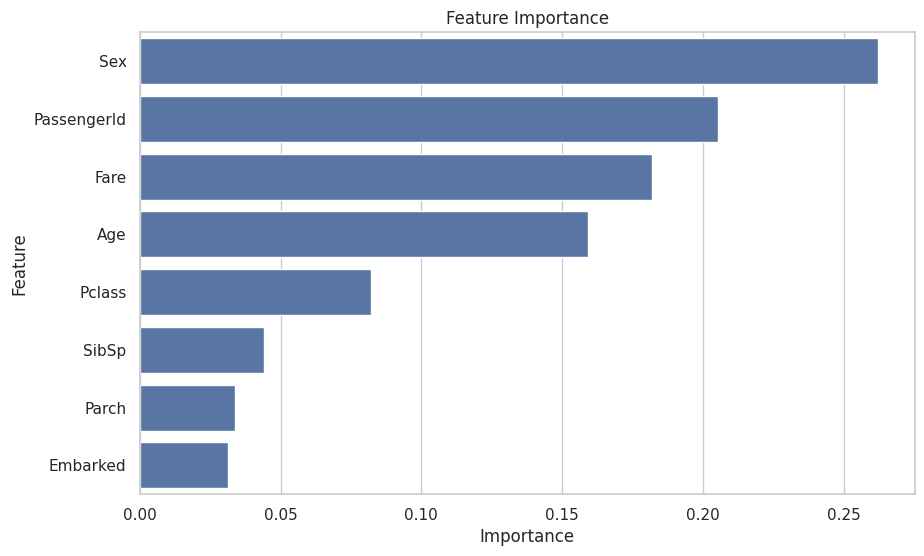

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, accuracy_score

# Load the dataset
data = pd.read_csv("/content/sample_data/Titanic-Dataset.csv")

# Data Preprocessing
data = data.drop(columns=['Name', 'Ticket', 'Cabin'])  # Drop non-essential columns
data['Age'] = data['Age'].fillna(data['Age'].median())  # Fill missing values in 'Age'
data['Embarked'] = data['Embarked'].fillna(data['Embarked'].mode()[0])  # Fill missing values in 'Embarked'
data['Sex'] = data['Sex'].map({'male': 0, 'female': 1})  # Encode 'Sex'
data['Embarked'] = data['Embarked'].map({'C': 0, 'Q': 1, 'S': 2})  # Encode 'Embarked'

# Separate features and target variable
X = data.drop('Survived', axis=1)
y = data['Survived']

# Split the data into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Train the RandomForestClassifier
model = RandomForestClassifier(n_estimators=100, random_state=42)
model.fit(X_train, y_train)

# Make predictions
y_pred = model.predict(X_test)

# Evaluate the model
accuracy = accuracy_score(y_test, y_pred)
print(f'Accuracy: {accuracy:.2f}')
print(classification_report(y_test, y_pred))

# Visualizations
sns.set(style="whitegrid")

# Survival rate by gender
plt.figure(figsize=(8, 6))
sns.barplot(x='Sex', y='Survived', data=data)
plt.title('Survival Rate by Gender')
plt.xlabel('Gender (0 = male, 1 = female)')
plt.ylabel('Survival Rate')
plt.show()

# Survival rate by passenger class
plt.figure(figsize=(8, 6))
sns.barplot(x='Pclass', y='Survived', data=data)
plt.title('Survival Rate by Passenger Class')
plt.xlabel('Passenger Class')
plt.ylabel('Survival Rate')
plt.show()

# Age distribution of survivors vs non-survivors
plt.figure(figsize=(12, 6))
sns.histplot(data[data['Survived'] == 1]['Age'], kde=True, label='Survived', color='g', bins=30)
sns.histplot(data[data['Survived'] == 0]['Age'], kde=True, label='Not Survived', color='r', bins=30)
plt.title('Age Distribution of Survivors vs Non-Survivors')
plt.xlabel('Age')
plt.ylabel('Frequency')
plt.legend()
plt.show()

# Fare distribution by survival
plt.figure(figsize=(12, 6))
sns.histplot(data[data['Survived'] == 1]['Fare'], kde=True, label='Survived', color='g', bins=30)
sns.histplot(data[data['Survived'] == 0]['Fare'], kde=True, label='Not Survived', color='r', bins=30)
plt.title('Fare Distribution of Survivors vs Non-Survivors')
plt.xlabel('Fare')
plt.ylabel('Frequency')
plt.legend()
plt.show()

# Feature importance
importances = model.feature_importances_
features = X.columns
indices = np.argsort(importances)[::-1]

plt.figure(figsize=(10, 6))
sns.barplot(x=importances[indices], y=features[indices])
plt.title('Feature Importance')
plt.xlabel('Importance')
plt.ylabel('Feature')
plt.show()
